# Normalizar y Reducir atributos

### 2. Importación de librerías y archivos

In [1]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para manejo de datos
import pandas as pd
# Librería para normalización
from sklearn.preprocessing import MinMaxScaler
# Librería para utilización de expresiones matemáticas
import numpy as np

In [2]:
# cargar los datos en csv
data= pd.read_excel('empleadosTecnologiaAlpes.xlsx', sheet_name='empleadosTecnologíaAlpes')
#Visualizar los datos
data.head()

,Edad,Retirado,TarifaSalarial,ID Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,...,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
0,41,Si,1102,3,1,2,Ciencias de la vida,1.0,1,2,...,80,0,8,0,1,2015-07-26,6,4,0,5
1,49,No,279,1,8,1,Ciencias de la vida,1.0,2,3,...,80,1,10,3,3,2011-02-15,10,7,1,7
2,37,Si,1373,1,2,2,Otro,1.0,4,4,...,80,0,7,3,3,2021-06-02,0,0,0,0
3,33,No,1392,1,3,4,Ciencias de la vida,1.0,5,4,...,80,0,8,3,3,2013-09-26,8,7,3,0
4,27,No,591,1,2,1,Medicina,1.0,7,1,...,80,1,6,3,3,2019-03-02,2,2,2,2


### 3. Revisando la distribución

In [5]:
data[['PorcentajeIncrementoSalarioUltimoAnnio']].head()

,PorcentajeIncrementoSalarioUltimoAnnio
0,11
1,23
2,15
3,11
4,12


<AxesSubplot:>

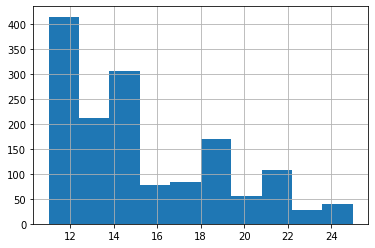

In [6]:
#Graficar el histograma
hist = data['PorcentajeIncrementoSalarioUltimoAnnio'].hist(bins=10)
hist

In [7]:
data['Salarario anterior']=data['SalarioMensual']-(data['SalarioMensual']*(data['PorcentajeIncrementoSalarioUltimoAnnio']/100))
data[['SalarioMensual','Salarario anterior']].head()

,SalarioMensual,Salarario anterior
0,5993,5333.77
1,5130,3950.10
2,2090,1776.50
3,2909,2589.01
4,3468,3051.84


### 4. Normalización

<AxesSubplot:>

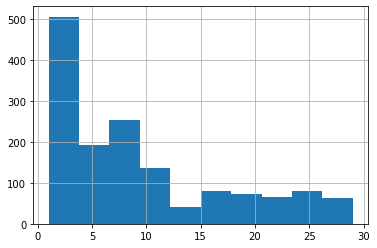

In [8]:
#Graficar el histograma
hist = data['DistanciaDesdeCasa'].hist(bins=10)
hist

In [9]:
#Normalizar
#Se crea el normalizador
normalizador = MinMaxScaler()
#Se ajusta los datos requeridos
data[['distacasa_normalizada']] = normalizador.fit_transform(data[['DistanciaDesdeCasa']])
data[['distacasa_normalizada']].head()

,distacasa_normalizada
0,0.000000
1,0.250000
2,0.035714
3,0.071429
4,0.035714


<AxesSubplot:>

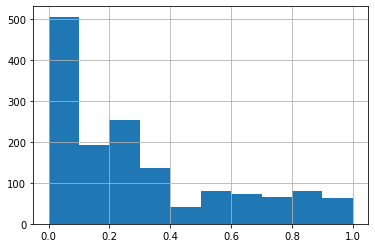

In [10]:
#Graficar el histograma
hist = data['distacasa_normalizada'].hist(bins=10)
hist

Vemos que no se cumple tampoco la curva gaussiana, sin embargo la normalización de los datos no pretende hacer que los datos tengan una distribución normal, en lugar de eso lo que haces es estandarizar para que sus datos tengan media cero y varianza unitaria.

### 5. Transformación Logarítmica

La utilización de logaritmo es una transformación fuerte que tiene un efecto importante en la forma de la distribución. Esta técnica, como el método de la raíz cuadrada, se utiliza a menudo para reducir la asimetría de los datos. Sin embargo, cabe señalar que no se puede aplicar a valores cero o negativos, porque para estos valores no se puede calcular un logaritmo.

Como en la normalización no logramos obtener la curva gaussiana que es importante para que los datos que tenemos sean de forma normal (también conocido como seguir una curva de campana o gaussiana) es importante para la mayoría de las pruebas paramétricas que deseamos realizar. Esto incluye el análisis de regresión, la prueba T de dos muestras y el análisis de varianza que se puede realizar en Python, que hemos revisado en otras lecciones.

In [11]:
# Realizamos una columna nueva aplicando el logarítmo
data['distacasa_log']=data['DistanciaDesdeCasa'].apply(np.log)
data[['distacasa_log']].head()

,distacasa_log
0,0.000000
1,2.079442
2,0.693147
3,1.098612
4,0.693147


<AxesSubplot:>

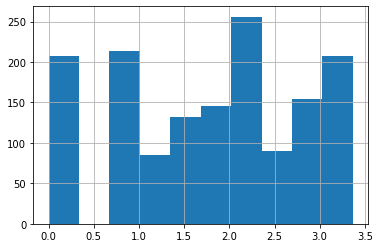

In [13]:
#Graficar el histograma
hist = data['distacasa_log'].hist(bins=10)
hist

Vemos que con esta transformación nos acercamos mucho más a la curva de campana, sin embargo se podría intentar aplicar un par de veces más para reducir la asimetría y obtener lo deseado.

<AxesSubplot:>

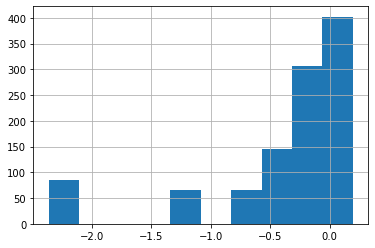

In [15]:
# Realizamos una columna nueva aplicando el logarítmo
data['distacasa_log2']=data['distacasa_log'].apply(np.log)
hist = data['distacasa_log2'].hist(bins=10)
hist

<AxesSubplot:>

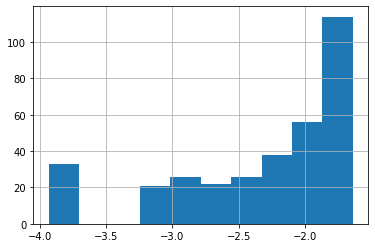

In [16]:
# Realizamos una columna nueva aplicando el logarítmo
data['distacasa_log3']=data['distacasa_log2'].apply(np.log)
hist = data['distacasa_log3'].hist(bins=10)
hist

### Extensión
En la empresa de Tecnología de los Alpes, está buscando realizar una caracterízación de los datos con los que se cuentan. Para esto vamos a empezar con las siguientes tareas:

* Utiliza la columna PorcentajeIncrementoSalarioUltimoAnnio para calcular el salario el año anterior. 
* Normaliza la distancia al trabajo entre 0 y 1. 
